In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')

n_public_information_patterns = 128
q_list = np.logspace(1, 3, 40).astype(np.int32)
mg_list = np.logspace(1, 3, 40).astype(np.int32)

In [3]:
# # H / N
# xs, ys = [], []
# for a in a_list:
#     file_path = f'../results/a{a}s{s}.csv'
#     df = pd.read_csv(file_path)

#     d = {p: [] for p in range(n_public_information_patterns)}

#     for i, row in tqdm(df.iterrows()):
#         d[row.public_information].append(row[' excess_demand'])

#     h = np.mean([np.mean(v)**2 for v in d.values()])


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


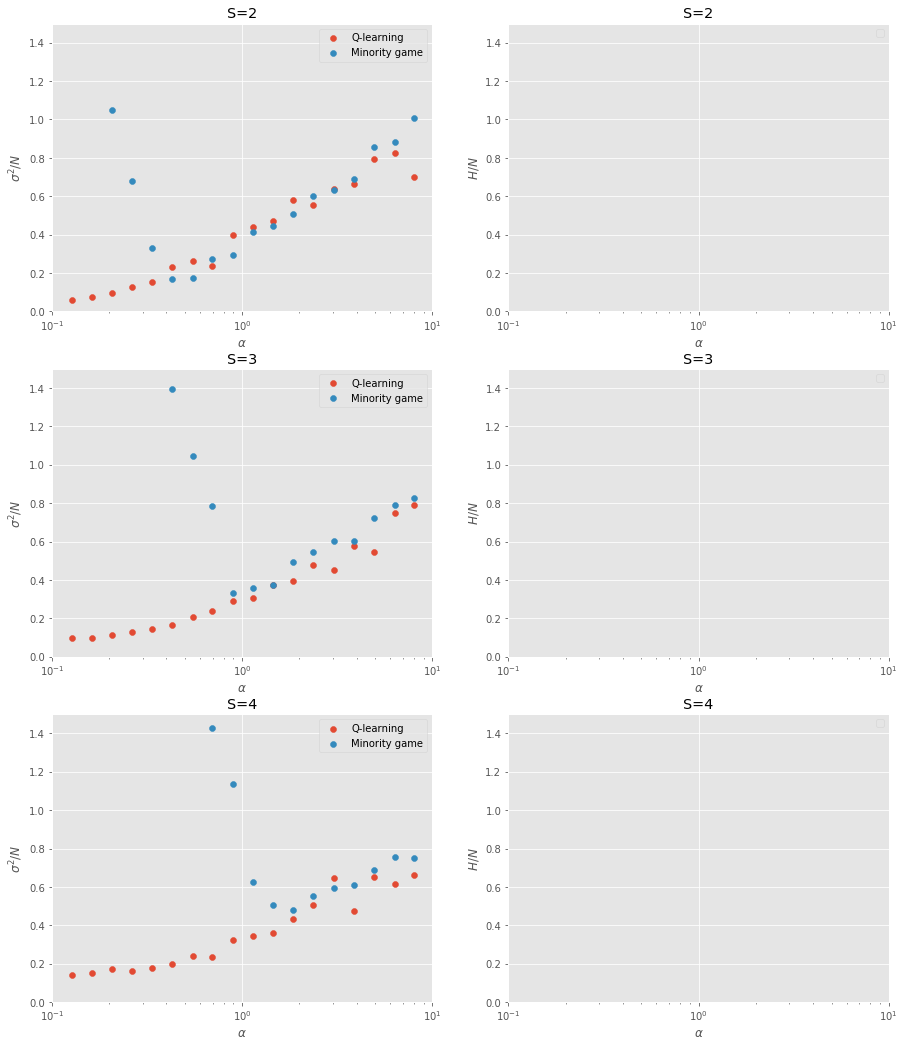

In [14]:
fig = plt.figure(figsize=(15, 18))

for i, s in enumerate([2, 3, 4]):
    # sigma^2 / N
    ax = fig.add_subplot(3, 2, 2 * i + 1)

    # Q-learning agents
    xs, ys = [], []
    mg = 0
    for q in q_list:
        file_path = f'../results/q{q:03d}m{mg:03d}s{s}_step{100000}.csv'
        df = pd.read_csv(file_path)

        sigma = np.sqrt(np.mean(df.excess_demand**2))

        xs.append(n_public_information_patterns / q)
        ys.append(sigma**2 / q)
    
    ax.scatter(xs, ys, label='Q-learning')

    # Minority game agents
    xs, ys = [], []
    q = 0
    for mg in mg_list:
        file_path = f'../results/q{q:03d}m{mg:03d}s{s}_step{100000}.csv'
        df = pd.read_csv(file_path)

        sigma = np.sqrt(np.mean(df.excess_demand**2))

        xs.append(n_public_information_patterns / mg)
        ys.append(sigma**2 / mg)
    
    ax.scatter(xs, ys, label='Minority game')

    ax.set_title(f'S={s}')
    ax.legend()
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$\sigma^2 / N$')
    ax.set_xscale('log')
    ax.set_xlim(0.1, 10)
    ax.set_ylim(0.0, 1.5)
    ax.set_xticks([0.1, 1.0, 10.0])

    # H / N
    ax = fig.add_subplot(3, 2, 2 * i + 2)

    # Q-learning agents
    xs, ys = [], []

    # Minority game agents
    xs, ys = [], []

    ax.set_title(f'S={s}')
    ax.legend()

    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$H / N$')

    ax.set_xscale('log')
    
    ax.set_xlim(0.1, 1.0)
    ax.set_ylim(0.0, 1.5)

    ax.set_xticks([0.1, 1.0, 10])

plt.legend()

plt.show()